<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_514_rails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

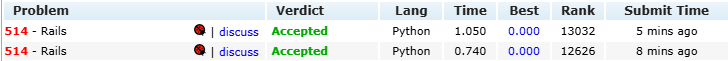

**@PDF: [UVA 514 - Rails](https://onlinejudge.org/external/5/514.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 514 Rails

There is a famous railway station in PopPush City. Country there is incredibly hilly. The station was built in last century. Unfortunately, funds were extremely limited that time. It was possible to establish only a surface track. Moreover, it turned out that the station could be only a dead-end one (see picture) and due to lack of available space it could have only one track.
```
5, 4, 3, 2, 1 -> B
Station
A <- 1, 2, 3, 4, 5
```

The local tradition is that every train arriving from the direction A continues in the direction B with coaches reorganized in some way. Assume that the train arriving from the direction A has $N \le 1000$ coaches numbered in increasing order 1, 2,..., N. The chief for train reorganizations must know whether it is possible to marshal coaches continuing in the direction B so that their order will be $a_{1}, a_{2}, ..., a_{N}$. Help him and write a program that decides whether it is possible to get the required order of coaches. You can assume that single coaches can be disconnected from the train before they enter the station and that they can move themselves until they are on the track in the direction B. You can also suppose that at any time there can be located as many coaches as necessary in the station. But once a coach has entered the station it cannot return to the track in the direction A and also once it has left the station in the direction B it cannot return back to the station.

## Input

The input file consists of blocks of lines. Each block except the last describes one train and possibly more requirements for its reorganization. In the first line of the block there is the integer N described above. In each of the next lines of the block there is a permutation of $1, 2, ..., N$. The last line of the block contains just '0'.

The last block consists of just one line containing '0'.

## Output

The output file contains the lines corresponding to the lines with permutations in the input file. A line of the output file contains 'Yes' if it is possible to marshal the coaches in the order required on the corresponding line of the input file. Otherwise it contains 'No'. In addition, there is one empty line after the lines corresponding to one block of the input file. There is no line in the output file corresponding to the last "null" block of the input file.

## Sample Input

5\
1 2 3 4 5\
5 4 1 2 3\
0\
6\
6 5 4 3 2 1\
0\
0


## Sample Output

Yes\
No\
\
Yes

In [ ]:
from sys import stdin, stdout

while True:  # Outer loop: Processes multiple test cases. The program continues to run until it receives a specific input ("0") that signals the end of input. This is a common pattern in competitive programming.
    l = stdin.readline().strip()  # Reads a line from standard input, removes leading/trailing whitespace, and assigns it to the variable 'l'. This line is expected to contain the number of elements in the input sequence.
    if l == "0":  # Checks if the input line is "0".
        break  # If it is, the loop breaks, indicating the end of the input.

    n = int(l)  # Converts the input line (which represents the number of elements) to an integer and stores it in the variable 'n'.
    in_order = [i + 1 for i in range(n)]  # Creates a list named 'in_order' containing integers from 1 to 'n' in ascending order. This represents the original, sorted sequence of elements.

    l = stdin.readline().strip()  # Reads another line from standard input, which represents the desired output order.
    while l != "0":  # Inner loop: Processes individual output order sequences until "0" is encountered.
        out_order = list(map(int, l.split()))  # Converts the space-separated integers in the input line into a list of integers called 'out_order'.
        can_do = True  # Initializes a boolean variable 'can_do' to True. This variable will track whether the desired output order is achievable.

        stack = []  # Initializes an empty list named 'stack'. This list will be used as a stack data structure to simulate the shunting process.
        in_i = 0  # Initializes an index 'in_i' to 0, representing the current position in the 'in_order' list.
        out_i = 0  # Initializes an index 'out_i' to 0, representing the current position in the 'out_order' list.

        while out_i < n:  # This loop simulates the shunting process, attempting to produce the 'out_order' from the 'in_order'.
            # Bypass the stack (push followed by pop)
            if in_i < n and in_order[in_i] == out_order[out_i]:  # Checks if the next element in 'in_order' is the element we want next in 'out_order'.
                in_i += 1  # If it is, increment 'in_i' (move to the next element in 'in_order').
                out_i += 1  # Also, increment 'out_i' (we've successfully processed the next element in 'out_order').
            # Search the stack (pop)
            elif len(stack) > 0 and stack[-1] == out_order[out_i]:  # Checks if the top element of the stack is the element we want next in 'out_order'.
                stack.pop()  # If it is, pop the element from the stack (simulating taking it out).
                out_i += 1  # Increment 'out_i' (we've processed the next element).
            # Push into stack
            else:  # If neither of the above conditions is met, we need to push an element onto the stack.
                if in_i < n:  # Checks if there are more elements to push from 'in_order'.
                    stack.append(in_order[in_i])  # Push the next element from 'in_order' onto the stack.
                    in_i += 1  # Increment 'in_i'.
                else:  # If there are no more elements to push and we still haven't produced 'out_order'...
                    can_do = False  # The desired output order is not achievable.
                    break  # Exit the inner loop.

        stdout.write("Yes\n" if can_do else "No\n")  # Prints "Yes" if the desired output order is achievable, "No" otherwise.
        l = input().strip()  # Reads the next output order sequence.

    print()  # Prints a blank line between test cases.